# 1. Search

*I have moved to the top of the page all of the imports that I will need for this notebook.*

In [ ]:
import matplotlib.pyplot as plt
import random
import math
import copy

%matplotlib inline

## 1.1 The TSP

For these examples, I need a hard problem. How about the Traveling Salesperson Problem (TSP)? The problem is: given a set of cities, what is the shortest path that will visit all of them, and return home?

First we need a set of cities. I use a dictionary to associate each number of a city with its geographical location:

In [ ]:
cities = {0: (60, 200), 1: (180, 200), 2: (80, 180), 3: (140, 180),
          4: (20, 160), 5: (100, 160), 6: (200, 160), 7: (140, 140),
          8: (40, 120), 9: (100, 120), 10: (180, 100), 11: (60, 80),
          12: (120, 80), 13: (180, 60), 14: (20, 40), 15: (100, 40),
          16: (200, 40), 17: (20, 20), 18: (60, 20), 19: (160, 20)}

Let's see where these cities are:

In [ ]:
def distance(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

In [ ]:
def plot_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 200])
    axes.set_ylim([0, 200])
    plt.plot([d[0] for d in xy], [d[1] for d in xy], "-o")
    
def scatter_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 200])
    axes.set_ylim([0, 200])
    plt.scatter([d[0] for d in xy], [d[1] for d in xy])
    
def tour_distance(tour):
    total = 0
    current = tour[0]
    for city in tour[1:]:
        total += distance(cities[current], cities[city])
        current = city
    total += distance(cities[tour[-1]], cities[tour[0]])
    return total

In [ ]:
tour_distance(range(20))

2004.4899612231877

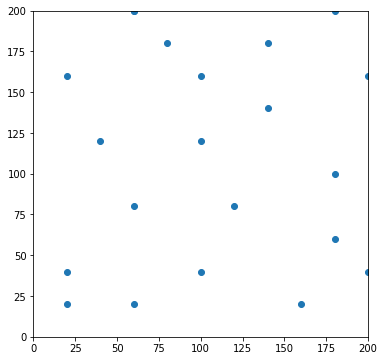

In [ ]:
scatter_tour(range(20))

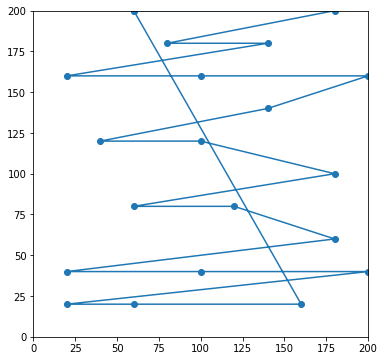

In [ ]:
plot_tour(range(20))

How hard is this problem? It turns out that TSP is as hard as they come. We call this **NP hard**. It is very hard because there are so many possibilities, and each new city multiplies those possibilities. And, the problem can't be divided into subproblems (like sorting can be).

For an $n$ city problem, there are factorial($n - 1$) possible routes. Consider just 20 cities.

In [ ]:
# Iterative solution:
def factorial(n):
    retval = 1
    for i in range(1, n + 1):
        retval = retval * i
    return retval

# Recursive solution:
def factorial(n):
    if n == 1:
        return 1
    else:
        return n * factorial(n - 1)

In [ ]:
factorial(20 - 1)

121645100408832000

To know if we found the shortest, we might have to check all of those. But that is far too many. This kind of problem is often called intractable.

$$ O(factorial(n - 1)) $$

$$ O(n!) $$

## 1.2 Greedy Method

How can we solve this problem of searching for the optimal path? As an example, suppose that you could just pick the closest city to visit at each city. This is called a "greedy" method, because it greedily picks the locally closest.

How good is it?

In [ ]:
def greedy_method():
    tour = [0]
    while True:
        min_dist = 100000
        min_city = -1
        for j in range(20):
            if j in tour:
                continue
            dist = distance(cities[tour[-1]], cities[j])
            if dist < min_dist:
                min_dist = dist
                min_city = j
        if min_city == -1:
            break
        tour.append(min_city)
    return tour

In [ ]:
%%time
greedy_tour = greedy_method()
greedy_tour

CPU times: user 177 µs, sys: 14 µs, total: 191 µs
Wall time: 194 µs


In [ ]:
tour_distance(greedy_tour)

1064.3934369990914

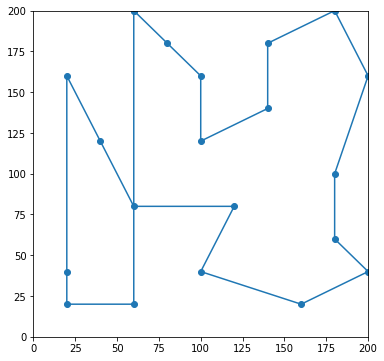

In [ ]:
plot_tour(greedy_tour)

Not too bad, but we can do better. Ok, let's try some other algorithms.

## 1.3 Guess and Step

Let's consider a simple method of problem solving: **guess and step**. First, just make a guess and note how close you are to a solution. Next, pick some piece of your guess and consider a slight change. If the variation is worse, don't make the change. If the variation is better, go ahead make the change. Now, continue making slight changes until you get a good enough solution. We will need:

* a method of representing a problem (e.g., **dna**, or **tour**)
* a measure of how good the guess is (e.g., a **fitness score**)
* a method of making slight changes (e.g., **mutation**)

At this point it is clear to see that analogy with Biological systems.

Let's explore an iterative guess-and-check algorithm.

We need a method for creating random "tours":

In [ ]:
def make_tour():
    ret_list = []
    for i in range(len(cities)):
        city = random.choice(range(len(cities)))
        while city in ret_list:
            city = random.choice(range(len(cities)))
        ret_list.append(city)
    return ret_list

In [ ]:
guess = make_tour()
guess

[8, 13, 7, 19, 15, 2, 4, 0, 3, 9, 16, 1, 11, 14, 17, 10, 6, 12, 18, 5]

In [ ]:
tour_distance(guess)

2035.883498108633

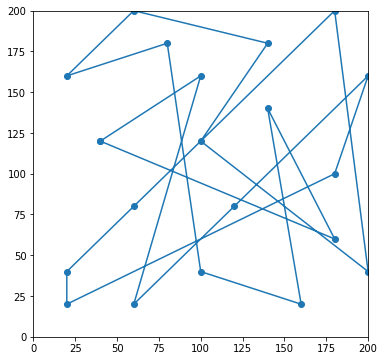

In [ ]:
plot_tour(guess)

And we need a method for measure a tour's "fitness". We'll use "total distance".

In [ ]:
def fitness(tour):
    return tour_distance(tour)

In [ ]:
fitness(greedy_tour)

1064.3934369990914

In [ ]:
fitness(guess)

2035.883498108633

Finally, we need a method of mutating a tour. Tours aren't just random numbers: they are a circuit. For this problem, we'll use a specialized mutation function that just swaps two cities. That way it will always be a valid circuit.

In [ ]:
def mutate(tour):
    tour = copy.copy(tour)
    # Pick two points and swap:
    point1 = random.randint(0, len(cities) - 1)
    point2 = random.randint(0, len(cities) - 1)
    tour[point1], tour[point2] = tour[point2], tour[point1]
    return tour

In [ ]:
print(guess)
guess = mutate(guess)
print(guess)

[8, 13, 7, 19, 15, 2, 4, 0, 3, 9, 16, 1, 11, 14, 17, 10, 6, 12, 18, 5]
[8, 13, 7, 19, 15, 2, 1, 0, 3, 9, 16, 4, 11, 14, 17, 10, 6, 12, 18, 5]


Now, let's iteratively mutate the guess, and ignore it if it is worse, but replace the original guess if the mutation is better.

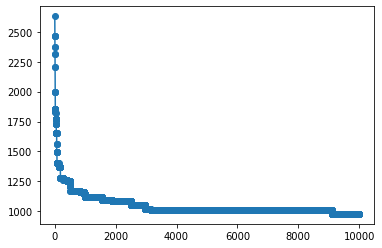

<Figure size 432x288 with 0 Axes>

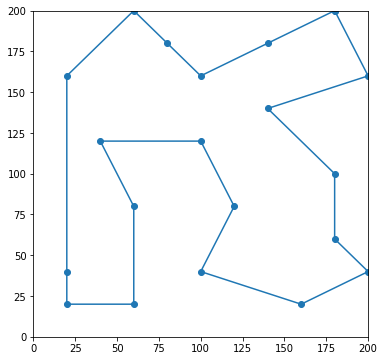

In [ ]:
guess = make_tour()
fit_list = [fitness(guess)]

for i in range(10000):
    new_guess = copy.copy(guess)
    for j in range(2):
        new_guess = mutate(new_guess)
    f1 = fitness(guess)
    f2 = fitness(new_guess)
    if f2 < f1:
        fit_list.append(f2)
        guess = new_guess
    else:
        fit_list.append(f1)
plt.plot(fit_list, marker="o")
plt.figure()
plot_tour(guess)

In [ ]:
guess, fitness(guess)

([1, 3, 5, 2, 0, 4, 14, 17, 18, 11, 8, 9, 12, 15, 19, 16, 13, 10, 7, 6],
 977.5305219889389)

That's not too bad! Perhaps a bit better than the greedy method used. 

## 1.4 Hill Climbing

This guess-and-step methodology is actually called *hill climbing* due to the following metaphor. Start at a random place on a hill. Pick a direction to step. If the place you would step to is higher than where you are, make the step, otherwise stay where you are. This little algorithm will eventually take you to the top of the hill. However, it might might not take you to the highest place around because you could get trapped on a little plateau (i.e., you would have to step to a lower place before stepping to even higher ground).

This is part of Computer Science that can be viewed as "search for the solution."


In [ ]:
def hillclimb(times):
    guess = make_tour()
    fit_list = [fitness(guess)]

    for i in range(times):
        new_guess = mutate(guess)
        f1 = fitness(guess)
        f2 = fitness(new_guess)
        if f2 < f1:
            fit_list.append(f2)
            guess = new_guess
        else:
            fit_list.append(f1)
    plt.plot(fit_list, marker="o")
    plt.figure()
    plot_tour(guess)
    return guess, fitness(guess)

([7, 16, 19, 15, 18, 17, 14, 11, 9, 3, 1, 6, 10, 13, 12, 8, 4, 0, 2, 5],
 1062.51176939595)

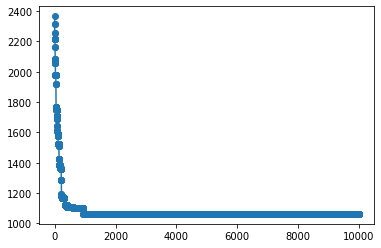

<Figure size 432x288 with 0 Axes>

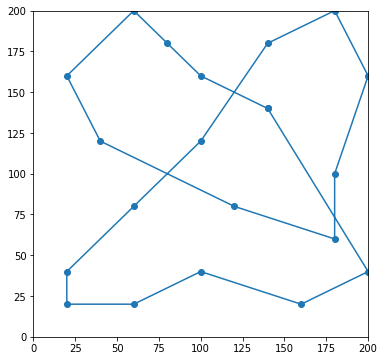

In [ ]:
hillclimb(10000)

In [ ]:
fit_list[-1]

973.7817059897642

## 1.5 Random Search

One solution to getting stuck on a plateau is to make random moves. If you do that all of the time, that is called "random search".

In [ ]:
def random_search(times):
    guess = make_tour()
    fit_list = [fitness(guess)]

    for i in range(times):
        new_guess = mutate(guess)
        f1 = fitness(guess)
        f2 = fitness(new_guess)
        if random.random() > .5:
            fit_list.append(f2)
            guess = new_guess
        else:
            fit_list.append(f1)
    plt.plot(fit_list, marker="o")
    plt.figure()
    plot_tour(guess)
    return guess, fitness(guess)

([11, 13, 19, 9, 3, 0, 12, 18, 8, 1, 14, 15, 17, 2, 4, 10, 16, 5, 7, 6],
 2202.215823653651)

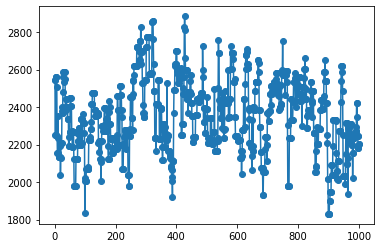

<Figure size 432x288 with 0 Axes>

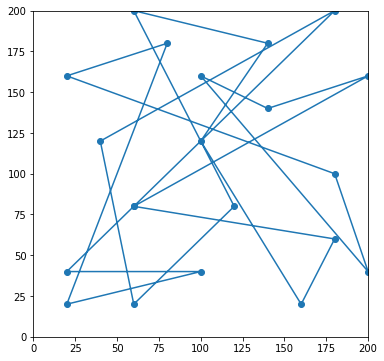

In [ ]:
random_search(1000)

## 1.6 Simulated Annealing

A slightly better version of hill climbing allows you to take random steps sometimes, regardless of whether or not the step would put you on higher ground. Of course, you don't always want to take random steps (that's called *random search*), so you'll need to control your randomness. If you only take random steps as dictated by a schedule, then you are using *simulated annealing*. Simulated annealing allows you to start off taking random steps quite often, but then slowly curb the habit. This works better than hill climbing when the ground is fairly smooth.

<img src="http://www.stormthecastle.com/blacksmithing/images/big-sword/forging-the-sword-1.jpg" />

In [ ]:
def simulated_annealing(times):
    guess = make_tour()
    fit_list = [fitness(guess)]

    for i in range(times):
        new_guess = mutate(guess)
        f1 = fitness(guess)
        f2 = fitness(new_guess)
        if random.random() > i/times:
            # Pick random:
            if random.random() < .5:
                fit_list.append(f1)  
            else:
                fit_list.append(f2)
                guess = new_guess
        elif f2 < f1:
            fit_list.append(f2)
            guess = new_guess
        else:
            fit_list.append(f1)
    plt.plot(fit_list, marker="o")
    plt.figure()
    plot_tour(guess)
    return guess, fitness(guess)

([5, 2, 0, 3, 1, 6, 7, 10, 13, 16, 19, 11, 8, 4, 14, 17, 18, 15, 12, 9],
 1021.5189362499026)

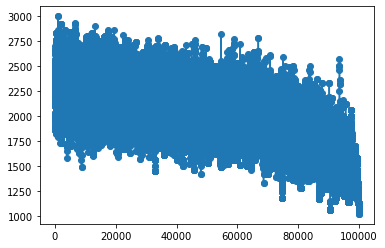

<Figure size 432x288 with 0 Axes>

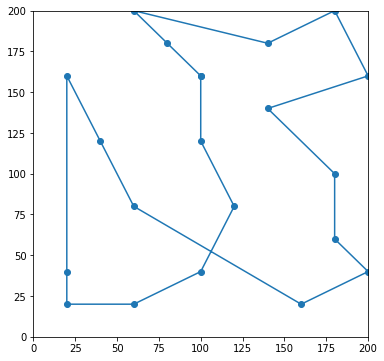

In [ ]:
simulated_annealing(100000)

## 1.7 Can we do better?

Simulated annealing can be described as a **"balance between Exploitation and Exploration".**

What could be better than simulated annealing? How about a whole group of people spread over the country side, each as their own simulated annealer? And they can communicate with each other. "Hey, I'm on high ground over here!" or "This area looks promising! Come over here!" This is the idea behind evolutionary algorithms.

## 1.8 Evolutionary Algorithms

Evolutionary algorithms are techniques for searching through a solution landscape in a generally effective manner. 

All evolutionary strategies have a core set of properties:

* A "population" of solutions
* Limited resources (not all solutions will survive)
* A measure of performance, called ''fitness''
* Preferential treatment toward the higher measured solutions (the most fit ones)
* Reliance on randomness

A typical evolutionary system follows this basic algorithm:

1. Create a random population of solutions
2. Compute a fitness measure for each
3. Create new members by mutating and/or combining old ones
4. Select the most fit for the next generation
5. Go to Step #3

### 1.8.1 Mutation

Mutation is the act of changing one gene in a genome. Often simulated mutation can take two forms: incremental mutation, or random value mutation. Incremental mutation takes the value of the gene and changes it by +/- a small amount. Random value mutation replaces the value by a random value between min and max.

### 1.8.2 Crossover

Crossover exchanges pieces of two genomes. Crossover can be a perfect shuffle, uniform, or point-based. Shuffle simply alternates between each parent. Uniform tosses an even coin to see if the gene comes from the mother or the father. Point-based mutation will only crossover at particular points. Shown here is a single point crossover:

<img src="http://cs.brynmawr.edu/~dblank/images/crossover-transparent.gif"/>

### 1.8.3 Selection

Those genes with the higher fitness are more likely to survive to the next generation.

In many implementations, crossover and selection are combined such that parents give rise to children that replace the lower fitness genomes.

### 1.8.4 Variations

There are two main flavors of evolutionary systems: the genetic algorithm (GA), and genetic programming (GP). GAs use a fixed genome size composed of bits, or, more generally, floating point numbers. GP uses trees of programming language expressions that can grow and shrink. If using a GA, then the human encoder of the problem assigns a meaning for each number in the gene. In a GP, the human encoder must create the functions and terminals used in the expressions, but the system builds its own representations. We will examine both of these techniques in the following sections.

## 1.9 Genetic Algorithm

To get started, we need three things:

1. a fitness function (fitness should always be >= 0)
2. a function to determine when we should stop
3. a random population

In [ ]:
target = "METHINKS IT IS LIKE A WEASEL"

"Hidden Target phrase"

'Hidden Target phrase'

In [ ]:
import string

In [ ]:
alphabet = string.ascii_uppercase + " "

In [ ]:
def make_guess():
    return [random.choice(alphabet) for c in range(len(target))]

def make_pop(size):
    pop = []
    for i in range(len(target)):
        pop.append([0, make_guess()])
    return pop

def mutate(guess):
    guess = copy.copy(guess)
    point = random.randint(0, len(target) - 1)
    guess[point] = random.choice(alphabet)
    return guess
    
def fitness(guess):
    return sum([guess[i] == target[i] for i in range(len(target))])

def select(pop):
    index = 0
    partsum = 0.0
    sumFitness = sum([item[0] for item in pop])
    if sumFitness == 0:
        raise Exception("Population has a total of zero fitness")
    spin = random.random() * sumFitness
    while index < len(pop) - 1:
        fitness = pop[index][0]
        if fitness < 0:
            raise Exception("Negative fitness in select: " + str(fitness))
        partsum += fitness
        if partsum >= spin:
            break
        index += 1
    return copy.copy(pop[index][1])

def crossover(pop):
    for j in range(int(len(pop)/2)):
        p1 = select(pop)
        p2 = select(pop)
        point = random.randint(0, len(target) - 1)
        child = []
        for i in range(len(target)):
            if i < point:
                child.append(p1[i])
            else:
                child.append(p2[i])
        pop[len(pop) - j - 1][1] = child

In [ ]:
guess = make_guess()
"".join(guess)

'MPFKMNPDJHXB SQOSIQVOYRYAAHB'

In [ ]:
pop = make_pop(10)

In [ ]:
pop[0]

[0,
 ['S',
  'M',
  ' ',
  'X',
  'U',
  'I',
  'L',
  'G',
  'K',
  'M',
  'L',
  'L',
  'I',
  'D',
  'U',
  'R',
  'Q',
  'M',
  'L',
  'E',
  ' ',
  'T',
  'O',
  'P',
  'H',
  'W',
  'H',
  'A']]

In [ ]:
guess = make_guess()
print(guess)
print(mutate(guess))

['X', 'S', 'P', 'M', 'Y', 'G', 'S', 'G', 'R', 'R', 'J', 'L', 'P', 'P', ' ', 'M', 'I', 'Y', 'J', 'Q', 'C', 'U', 'I', 'O', 'N', 'C', 'T', 'D']
['X', 'S', 'P', 'M', 'Y', 'G', 'S', 'G', 'A', 'R', 'J', 'L', 'P', 'P', ' ', 'M', 'I', 'Y', 'J', 'Q', 'C', 'U', 'I', 'O', 'N', 'C', 'T', 'D']


In [ ]:
fitness(pop[0][1])

1

In [ ]:
def evolve(pop):
    generations = 0
    while True:
        for i in range(len(pop)):
            pop[i][0] = fitness(pop[i][1])
        pop.sort(reverse=True)
        if pop[0][0] == len(target):
            break
        for i in range(2, 10): # not the top 20%
            pop[i][1] = mutate(pop[i][1])
        crossover(pop)
        if generations % 10 == 0:
            print("generations:", generations, "fitness:", pop[0][0], "".join(pop[0][1]))
        generations += 1
    print("generations:", generations, "fitness:", pop[0][0], "".join(pop[0][1]))

In [ ]:
pop = make_pop(10)
evolve(pop)

generations: 0 fitness: 5 XIKZOZGZ ICP S JQBLMSNKELVTM
generations: 10 fitness: 9 XIKZOYGS ICP S LQBPMGJKEFSEC
generations: 20 fitness: 11 XI GIFCZ ICP S LQFEBP KEFSEC
generations: 30 fitness: 14 EWHHFTGS ITP S LQFEBP KEFSEL
generations: 40 fitness: 15 EWHHFXGS ITP S LQFEBA KEFSEL
generations: 50 fitness: 15 EWKHJWGS ITT S LIFEPP ZEUSEL
generations: 60 fitness: 15 RWKHFAGS ITTQS LBHETA ZEXSEL
generations: 70 fitness: 16 RWKHFAGS ITTQS LBHEPA KEASEL
generations: 80 fitness: 17 VVKHFACS ITT S LIFELA NEASEL
generations: 90 fitness: 17 VWLHFACS ITT S LIFELA NEASEL
generations: 100 fitness: 20 SUKHYAKS ITTIS LIFE A NEASEL
generations: 110 fitness: 21 SUKHYNKS ITTIS LIFE A NEASEL
generations: 120 fitness: 22 MUYHYNKS ITTIS LIFE A NEASEL
generations: 130 fitness: 22 MUYHYNKS ITTIS LIFE A ZEASEL
generations: 140 fitness: 22 MUYHYNKS ITWIS LIFE A LEASEL
generations: 150 fitness: 22 MUYHYNKS ITWIS LIWE A ZEASEL
generations: 160 fitness: 23 MUYHYNKS IT IS LIWE A TEASEL
generations: 170 fitness: 2

# 2. Further Reading

1. Holland, John H. (1975) *Adaptation in Natural and Artificial Systems*. The University of Michigan Press, Ann Arbour.